In [16]:
# Github link:
https://github.com/Omar-HA-Issa/ML-fundamentals-2025

## Task 1: Data Loading and Initial Exploration

   pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000      0      0   24160  211.3375       B5        S    2    NaN   
1   0.9167      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St 

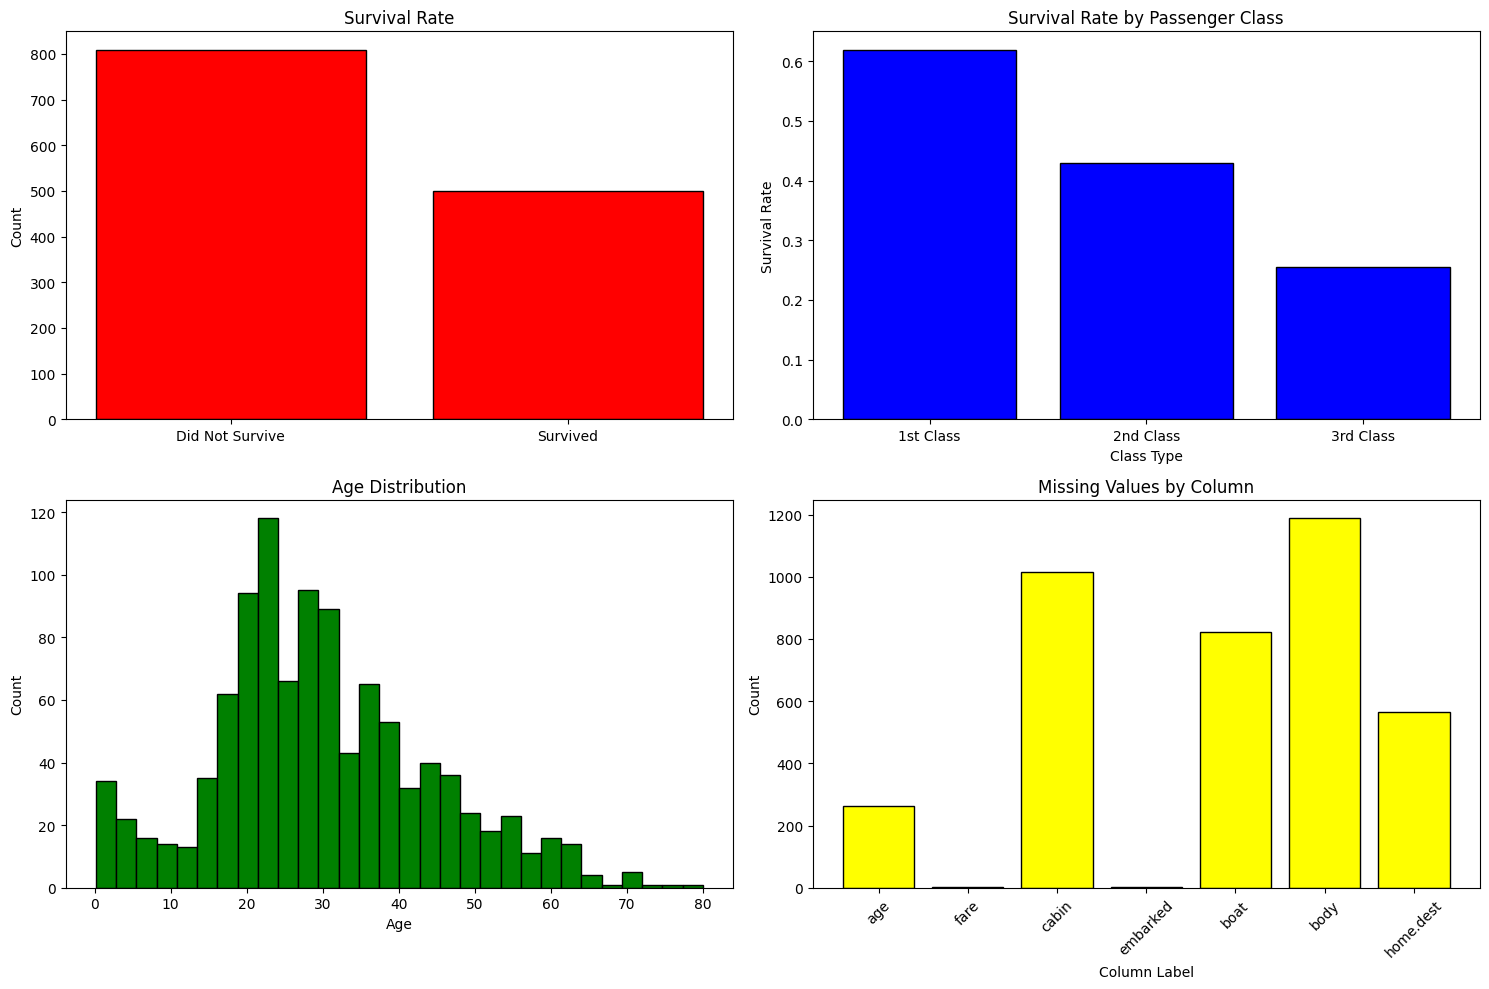

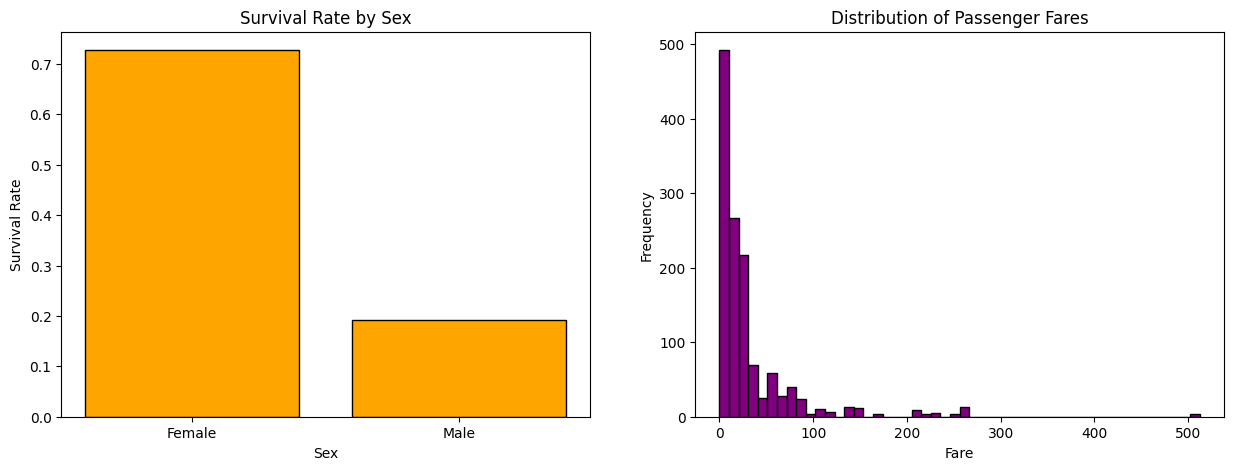

<Figure size 640x480 with 0 Axes>

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Loading dataset into a data frame
import pandas as pd
df = pd.read_excel(r'C:\Users\Omar Issa\Desktop\titanic3.xls')

# Displaying general information about the dataset
print(df.head())
print(df.info())

# Visualizing the dataset 
plt.figure(figsize=(15, 10))

# 1. Survival Distribution
plt.subplot(2, 2, 1)
survival_counts = df['survived'].value_counts()
plt.bar(['Did Not Survive', 'Survived'], [survival_counts[0], survival_counts[1]], color = 'red', edgecolor='black')
plt.title('Survival Rate')
plt.ylabel('Count')

# 2. Survival by Passenger Class
plt.subplot(2, 2, 2)
survival_by_class = df.groupby('pclass')['survived'].mean()
plt.bar(['1st Class', '2nd Class', '3rd Class'], survival_by_class, color = 'blue', edgecolor = 'black')
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.xlabel('Class Type')

# 3. Age Distribution
plt.subplot(2, 2, 3)
plt.hist(df['age'].dropna(), bins=30, color = 'green', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

# 4. Missing Values
plt.subplot(2, 2, 4)
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
plt.bar(range(len(missing_values)), missing_values.values, color = 'yellow', edgecolor='black')
plt.xticks(range(len(missing_values)), missing_values.index, rotation=45)
plt.title('Missing Values by Column')
plt.ylabel('Count')
plt.xlabel('Column Label')

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))

# 5. Survival by Sex
plt.subplot(1, 2, 1)
survival_by_sex = df.groupby('sex')['survived'].mean()
plt.bar(['Female', 'Male'], survival_by_sex, color = 'orange', edgecolor='black')
plt.title('Survival Rate by Sex')
plt.ylabel('Survival Rate')
plt.xlabel('Sex')


# 6. Fares Distribution
plt.subplot(1, 2, 2)
plt.hist(df['fare'], bins=50, color = 'purple', edgecolor='black')
plt.title('Distribution of Passenger Fares')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

plt.tight_layout()
plt.show()


## *Task One Remarks:* 

### Reasoning behind plots:

1) Plot 1: Survival rate bar chart was used for me to understand who survived and who didn't.
2) Plot 2: Passenger class survival rate could see the difference in survival rates per class, potentially indicating useful correlations.
3) Plot 3: Age distribution histogram allowed me to see the distribution of ages across the passengers of the titanic. This could aid in identifying any potential outliers and unusual trends in the distribution. This is important later when cleaning the data.
4) Plot 4: Missing values is important so I can gain insight into which columns need their data cleaned.
5) Plot 5: The sex survival rate plot is important to show the disparity in how females vs males survived, as historically females were allowed to board
  the rescue boats before men.
6) Plot 6: Fares distribution, similair to plot three, could help identify if there are outliers that need to be taken into account when cleaning the fares data.



## Task 2: Managing Missing Values

In [18]:
# Creating a copy of the data frame to avoid any issues
df_clean = df.copy()

# 1. Handle 'age':
# Strategy: Fill missing age values with median age
median_age = df_clean['age'].median()
df_clean['age'] = df_clean['age'].fillna(median_age)

# 2. Handle 'cabin':
# Strategy: Create 'deck' feature from first letter, then drop cabin
df_clean['deck'] = df_clean['cabin'].str[0]
df_clean['deck'] = df_clean['deck'].fillna('Unknown')

# 3. Handle 'fare':
# Strategy: Fill the missing value with the median
median_fares = df_clean.groupby('pclass')['fare'].median()
for pclass, median_fare in median_fares.items():
    mask = df_clean['pclass'] == pclass
    df_clean.loc[mask, 'fare'] = df_clean.loc[mask, 'fare'].fillna(median_fare)

# 4. Handling 'name':
# Strategy: Extract the title of the individuals and then drop the names.
df_clean['title'] = df_clean['name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

# Standardizing titles
title_mapping = {
    'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs',
    'Lady': 'Mrs', 'Countess': 'Mrs', 'Dona': 'Mrs',
    'Sir': 'Mr', 'Don': 'Mr', 'Jonkheer': 'Mr',
    'Capt': 'Officer', 'Col': 'Officer', 'Major': 'Officer',
    'Dr': 'Officer', 'Rev': 'Officer'
}
df_clean['title'] = df_clean['title'].map(title_mapping).fillna(df_clean['title'])

# Dropping columns that aren't needed for prediction
columns_drop = ['ticket', 'cabin', 'boat', 'body', 'home.dest','name', 'embarked']
df_clean = df_clean.drop(columns=columns_drop)

print("\nColumns dropped after Task 2:")
print(columns_drop)
print("\nFinal columns after Task 2:")
print(df_clean.columns.tolist())



Columns dropped after Task 2:
['ticket', 'cabin', 'boat', 'body', 'home.dest', 'name', 'embarked']

Final columns after Task 2:
['pclass', 'survived', 'sex', 'age', 'sibsp', 'parch', 'fare', 'deck', 'title']


## *Task 2 Remarks:*

### - Justification behind handling the missing values from the above features:
1. The *'age'* feature: The median is chosen because it is less sensitive to outliers compared to the mean. Age might have a skewed distribution, and filling missing values with the median ensures that we don't introduce bias or outliers in the dataset.
2.  The *'fare'* feature: Due to the presence of different passenger classes on the titanic, fares can vary heavily between the passengers, making a mean unsuitable. The median is used again because it is robust to outliers. However, instead of filling all missing fares with the same median, I grouped by 'pclass' (since fares might differ between classes) and apply the class-specific median. This ensures that the missing values are replaced with more contextually relevant values based on passenger class.

### - Justification behind creating new features from exisiting features:
1. The *'deck'* feature from *'cabin'*: The most important part of the cabin feature was it's deck location. Different decks were assigned to different floors on the titanic, thus impacting the survival rate of the passengers. The accompanying information adjacent to the deck level held no significant value in my opinion on the survivability of the passenger. Hence, I extracted only the deck level of the passenger from the 'cabin' feature as I found it the most important. I also filled in any missing values in the 'deck' feature with "Unknown" to indicate that the deck is unknown for those rows.
2. The *'title'* feature from *'name'*: I determined that the name of the individual holds no value in determining if said individual will survive or not. However, the title preceeding the individual's name can indicate potentially their class, wealth, their sex, and their maritial status (Mrs. vs Miss for example). This could help in predicting if the person will survive or not. Additionally, I ran into errors when keeping the 'name' feature later on in this assignment. Thus, to reduce complexity of the data and errors, only the titles were extracted and standardized from the 'name' column. 

### - Justification behind dropping features:
- There were a few reasons behind dropping a few features from the original dataset. The first reason was that a new feature column was extracted from the original feature, thus was dropped as all relevant information from the original feature was extracted, such 'name' and 'cabin'. The second reason was that the features were found to have no important data that could aid in the predicition model and were then dropped.    




## Task 3: Encoding Categorical Variables

In [19]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np

# Categorical features identified after task 2
categorical_features = ['pclass', 'sex', 'deck', 'title']

# Creating the encoder
encoder = OneHotEncoder(drop='first', sparse_output=False) # Drop first was used to prevent issues with multicollinearity
encoded_features = encoder.fit_transform(df_clean[categorical_features])

# Getting feature names for encoded columns
feature_names = []
for i, feature in enumerate(categorical_features):
   categories = encoder.categories_[i][1:]  
   feature_names.extend([f"{feature}_{cat}" for cat in categories])

# Creating a DataFrame with encoded features
encoded_df = pd.DataFrame(encoded_features, columns=feature_names,index=df_clean.index)

print("\nColumns after encoding:")
print(encoded_df.columns.tolist())
print("\nEncoded columns:")
print(encoded_df)

df_encoded = pd.concat([df_clean.drop(columns=categorical_features), encoded_df], axis=1)


Columns after encoding:
['pclass_2', 'pclass_3', 'sex_male', 'deck_B', 'deck_C', 'deck_D', 'deck_E', 'deck_F', 'deck_G', 'deck_T', 'deck_Unknown', 'title_Miss', 'title_Mr', 'title_Mrs', 'title_Officer']

Encoded columns:
      pclass_2  pclass_3  sex_male  deck_B  deck_C  deck_D  deck_E  deck_F  \
0          0.0       0.0       0.0     1.0     0.0     0.0     0.0     0.0   
1          0.0       0.0       1.0     0.0     1.0     0.0     0.0     0.0   
2          0.0       0.0       0.0     0.0     1.0     0.0     0.0     0.0   
3          0.0       0.0       1.0     0.0     1.0     0.0     0.0     0.0   
4          0.0       0.0       0.0     0.0     1.0     0.0     0.0     0.0   
...        ...       ...       ...     ...     ...     ...     ...     ...   
1304       0.0       1.0       0.0     0.0     0.0     0.0     0.0     0.0   
1305       0.0       1.0       0.0     0.0     0.0     0.0     0.0     0.0   
1306       0.0       1.0       1.0     0.0     0.0     0.0     0.0     0.0  

## *Task 3 Remarks*:

- The one-hot encoding transformation converts categorical variables (like sex and passenger class) into binary columns (0s and 1s), which is crucial for machine learning models that can only process numerical data.
  
- This transformation creates separate columns for each category while dropping one category per feature to avoid redundancy (via drop = 'first'). For example, 'sex' becomes 'sex_male' (where 0 represents female and 1 represents male), and 'pclass' becomes 'pclass_2' and 'pclass_3' (with pclass_1 being dropped). This encoding ensures that the model doesn't assume any relationships between categories and can learn the true impact of each category on survival predictions independently.

## Task 4: Feature Scaling

In [20]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

numerical_features = ['age', 'fare', 'parch', 'sibsp']

# Creating copies for different scaling methods
df_standard = df_encoded.copy()
df_minmax = df_encoded.copy()

# StandardScaler:
scaler_standard = StandardScaler()
df_standard[numerical_features] = scaler_standard.fit_transform(df_standard[numerical_features])

# MinMaxScaler:
scaler_minmax = MinMaxScaler()
df_minmax[numerical_features] = scaler_minmax.fit_transform(df_minmax[numerical_features])

# Displaying Results
print("\nSample of StandardScaler results:")
print(df_standard[numerical_features].head())
print("\nSample of MinMaxScaler results:")
print(df_minmax[numerical_features].head())


Sample of StandardScaler results:
        age      fare     parch     sibsp
0 -0.039005  3.442540 -0.445000 -0.479087
1 -2.215952  2.286641  1.866526  0.481288
2 -2.131977  2.286641  1.866526  0.481288
3  0.038512  2.286641  1.866526  0.481288
4 -0.349075  2.286641  1.866526  0.481288

Sample of MinMaxScaler results:
        age      fare     parch  sibsp
0  0.361169  0.412503  0.000000  0.000
1  0.009395  0.295806  0.222222  0.125
2  0.022964  0.295806  0.222222  0.125
3  0.373695  0.295806  0.222222  0.125
4  0.311064  0.295806  0.222222  0.125


## *Task 4 Remarks:*

### - Difference between standardization (StandardScaler) and normalization (MinMaxScaler) methods:

- *Standardization* follows the formula  z = (x - μ) / σ, where the mean = 0 and standard deviation = 1. This method handles outliers better and has no bounded range, allowing for the easier use of algorithms and regression models with this method.
  
- *Normalization* follows the formula z = (x - min) / (max - min). This method follows a process of adjusting values measured on different scales to a common scale, and since MinMaxScaler is used, the range (scale) is between [0,1]. It also has a bounded range, making it harder to use algorithms and regression models with this method.

### - Which method is better for this model:
- Standardization (StandardScaler) is better suited to handle this model. Looking at the results, StandardScaler better handles outliers, particularly in features like 'fare' where values range from -2.21 to 3.44. The MinMaxScaler compresses these same values to a narrower range (0.29 to 0.41), potentially losing important variations in the data. Given that features like 'age' and 'fare' show significant outliers in the standardized results (-2.21, 3.44), StandardScaler's ability to preserve these meaningful differences while standardizing is crucial.
- Also the properties discussed above for the standardization method allows me to use logistic regression model and obtain proper results from it. Thus, standardization method has been adopted for use in this assignment. The data will be standardized after splitting it.

## Task 5: Data Splitting

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separating features and target
X = df_encoded.drop('survived', axis=1)  # 'survived' was dropped to prevent data leakage 
y = df_encoded['survived']               # Target      

# Splitting into training (60%) and validation (40%)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)

# Applying Standard scale after splitting the data
numerical_features = ['age', 'fare', 'parch', 'sibsp']
scaler = StandardScaler()

# Fitting and transforming on training data only
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])

# Transforming validation using fitted scaler
X_val[numerical_features] = scaler.transform(X_val[numerical_features])

# Printing results to verify distribution
print("Training distribution (60%):\n", y_train.value_counts(normalize=True))
print("Validation distribution (40%):\n", y_val.value_counts(normalize=True))

Training distribution (60%):
 survived
0    0.617834
1    0.382166
Name: proportion, dtype: float64
Validation distribution (40%):
 survived
0    0.618321
1    0.381679
Name: proportion, dtype: float64


## Task 5 Remarks:

### Explination and justification of the data splitting process:

- The data follows a 60-40 split. Where 60% of the data was split into training and 40% into validation.
  
- This 60-40 split was followed to allow the training set to gain sufficient data for the model to learn complex relationships between passenger features and survival. The remaining data for the validation set was followed to allow for a substantial size for reliable model assessment and detect overfitting effectively.

- The standard scale was applied after splitting of the data to avoid any data leakage from standardizing the results. 
  

## Task 6: Addressing Class Imbalance

In [22]:
from imblearn.over_sampling import SMOTE

# Checking the imbalance
print("Imbalance in training data:")
print(y_train.value_counts())
print("\nTraining set shape before SMOTE:", X_train.shape) 

# Fixing the imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train) 

# Results after using SMOTE
print("\nTraining set shape after SMOTE:", X_resampled.shape)
print("\nClass distribution after SMOTE:")
print(y_resampled.value_counts())

Imbalance in training data:
survived
0    485
1    300
Name: count, dtype: int64

Training set shape before SMOTE: (785, 19)

Training set shape after SMOTE: (970, 19)

Class distribution after SMOTE:
survived
0    485
1    485
Name: count, dtype: int64


## *Task 6 Remarks:*

### Justification for using SMOTE method:

- SMOTE was chosen over other methods for handling the class imbalance in the Titanic survival data because it provides a more controlled and balanced synthetic sample generation. While ADASYN for example focuses on generating more synthetic samples which are harder to learn by the model, SMOTE focuses on creating a uniform set of synthetic samples for the minority class.
  
- This uniform approach is more suitable for our Titanic dataset because survival likely depends on clear, documented factors (like passenger class, gender, and age) rather than complex, hard to learn patterns. 

## Task 7: Feature Selection

Variances of features:
age: 0.9905
sibsp: 0.8809
parch: 0.9218
fare: 0.9606
pclass_2: 0.1703
pclass_3: 0.2492
sex_male: 0.2433
deck_B: 0.0535
deck_C: 0.0581
deck_D: 0.0376
deck_E: 0.0293
deck_F: 0.0066
deck_G: 0.0032
deck_T: 0.0010
deck_Unknown: 0.1721
title_Miss: 0.1783
title_Mr: 0.2492
title_Mrs: 0.1499
title_Officer: 0.0143

Features with variance > 0.01:
['age', 'sibsp', 'parch', 'fare', 'pclass_2', 'pclass_3', 'sex_male', 'deck_B', 'deck_C', 'deck_D', 'deck_E', 'deck_Unknown', 'title_Miss', 'title_Mr', 'title_Mrs', 'title_Officer']

Shape before variance threshold: (970, 19)

Shape after variance threshold: (970, 16)


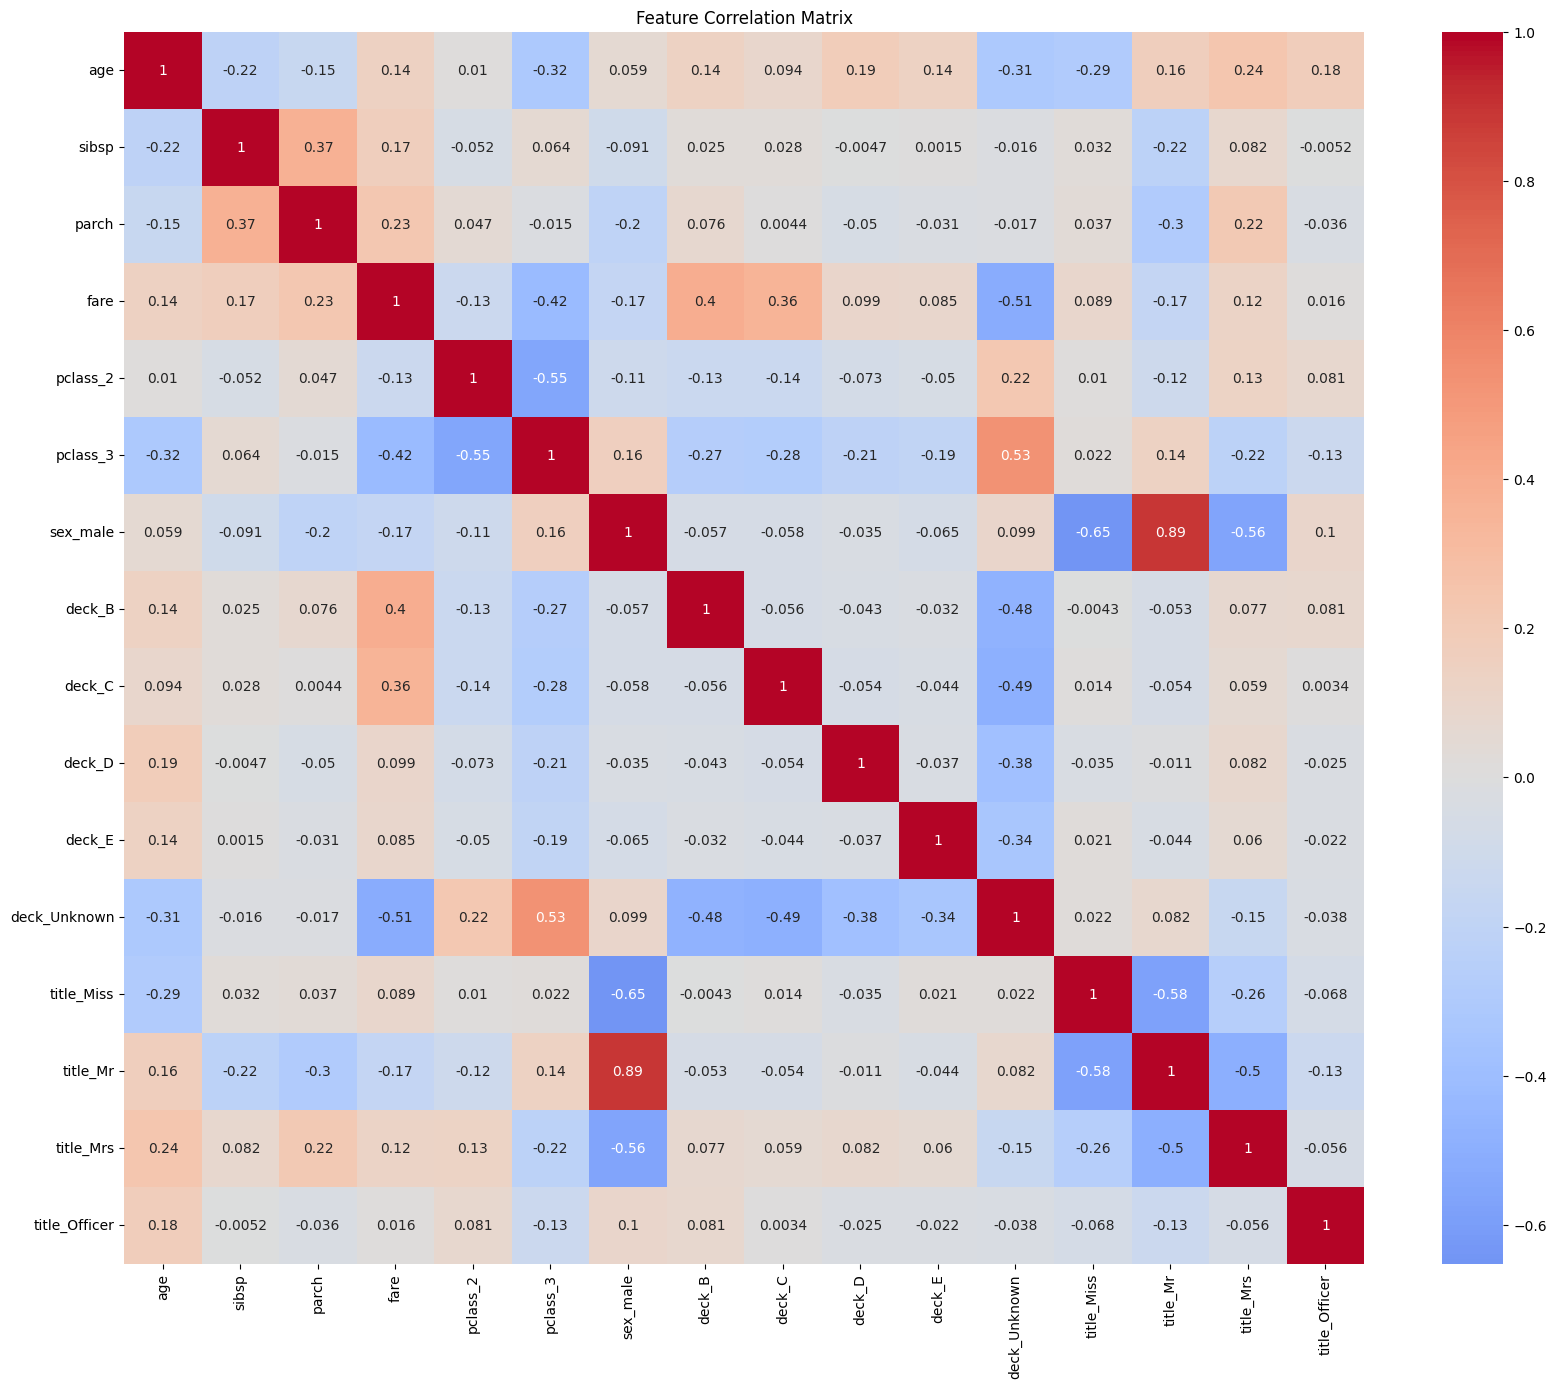


Shape after dropping title_Mr: (970, 15)

Features selected by Boruta:
['age', 'sibsp', 'fare', 'pclass_3', 'sex_male', 'deck_Unknown', 'title_Miss', 'title_Mr', 'title_Mrs']

Feature Ranking:
          Feature  Rank  Important
0             age     1       True
1           sibsp     1       True
3            fare     1       True
5        pclass_3     1       True
6        sex_male     1       True
13       title_Mr     1       True
14      title_Mrs     1       True
11   deck_Unknown     1       True
12     title_Miss     1       True
2           parch     2      False
4        pclass_2     3      False
7          deck_B     4      False
9          deck_D     5      False
10         deck_E     6      False
15  title_Officer     7      False
8          deck_C     8      False


In [23]:
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

# First: Variance analysis
variances = X_resampled.var()
print("Variances of features:")
for feature, variance in variances.items():
    print(f"{feature}: {variance:.4f}")

# Applying variance threshold
threshold = 0.01
selector = VarianceThreshold(threshold)
X_selected = selector.fit_transform(X_resampled)

# Displaying results after low variance features were dropped
selected_features = X_resampled.columns[selector.get_support()].tolist()
print("\nFeatures with variance > 0.01:")
print(selected_features)
print("\nShape before variance threshold:", X_resampled.shape)
print("\nShape after variance threshold:", X_selected.shape)

# Second: Correlation analysis
X_selected_df = pd.DataFrame(X_selected, columns=selected_features)
corr = X_selected_df.corr()
plt.figure(figsize=(20, 16))
sns.heatmap(corr, annot = True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()

X_selected_df = X_selected_df.drop('title_Mr', axis=1)
print("\nShape after dropping title_Mr:", X_selected_df.shape)

# Third: Boruta Feature Selection (Please note it will take a few seconds before the results are printed for this method) 
rf = RandomForestClassifier(n_jobs=-1, max_depth=5)
boruta = BorutaPy(rf, n_estimators='auto', verbose=0)
boruta.fit(X_selected, y_resampled)

# Getting selected feature names
selected_by_boruta = [selected_features[i] for i in range(len(selected_features)) if boruta.support_[i]]

print("\nFeatures selected by Boruta:")
print(selected_by_boruta)

# Showing ranking of features
feature_ranks = pd.DataFrame({'Feature': selected_features,'Rank': boruta.ranking_,'Important': boruta.support_})
print("\nFeature Ranking:")
print(feature_ranks.sort_values('Rank'))


## *Task Seven Remarks*:

### 1) Variance analysis: 

- A low variance threshold was set at (0.01) which is what I found online is commonly used to determine low variance.

- Numerical features (age, fare, sibsp, parch) show high variance (>0.8), indicating good feature diversity

- Most passenger class and title features show moderate variance (0.15-0.25)

- Deck features generally show low variance (<0.08), suggesting less predictive power and low informative categories. The features 'deck_G'(0.0038) and 'deck_T' (0.0010) were removed due to extremely low variance.

### 2) Correlation matrix  analysis:

- There was one strong correlation between 'title_Mr' and 'sex_male' (0.87), showing redundancy.
  
- There were a moderate amount of negative relationships, such 'fare' and 'pclass_3' (-0.43), reflecting price-class relationship.
 
- Family features (sibsp, parch) and the majority of 'deck' features had low amount of correlation with other features, suggesting the independence of their information.

### 3) Boruta algorithm analysis:

- The confirmed 10 important features are diverse, highlighting the economic, demographic, family, and social status of the individuals on the Titanic. These diverse passenger characteristics highlight their importance for survival prediction.
  
- Rejected features were mostly specific deck locations (B-F) and title_Officer, indicating low predictive value of these features compared to others.


## Task 8: Training a Logistic Regression Model

Overall Accuracy: 0.8053
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       324
           1       0.74      0.76      0.75       200

    accuracy                           0.81       524
   macro avg       0.79      0.80      0.79       524
weighted avg       0.81      0.81      0.81       524



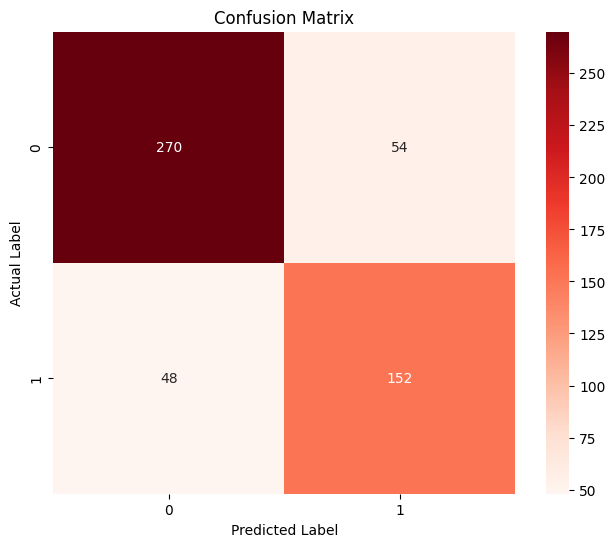

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Preparing data set after task seven results
X_val_selected = selector.transform(X_val)
X_val_df = pd.DataFrame(X_val_selected, columns=selected_features)
X_val_df = X_val_df.drop('title_Mr', axis=1)

# Training model
lr_model = LogisticRegression(random_state=42, max_iter=2000)
lr_model.fit(X_selected_df, y_resampled)
y_pred = lr_model.predict(X_val_df)

# Results
accuracy = accuracy_score(y_val, y_pred)
print(f"Overall Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_val, y_pred, zero_division=1))

# Displaying confusion matrix results on a seaborn plot to make it more visually appealing
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True,fmt='d', cmap='Reds', square=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

## *Task 8 Remarks:*

### - Analysis of the results:

- The overall accuracy of the regression model was 80.53%, which indicates a good accuracy of the model in predicting who actually survived the titanic and who didn't.
  
- Looking at the precision of the model, it seems like the model with more accurate at predicting who actually didn't survive the titanic at 85%, and less accurate at predicting who actually survived the titanic at 74%.

  
- The confusion matrix highlights the model's precision difference even more. The model proportionally identified fewer false positive predictions (incorrectly predicted survivals) than false negative predictions (incorrectly predicted deaths).